# Linear Regression from Scratch


The Simplest form of reg equation is y=m*x+b where y is estimated dependent value, x is independent variable,m is slope and b is bias or constant
    


    

#### For Linear Regression we need to understand Loss function,optimization Algorithm(Gradient Descent)

### Let's first create our loss function (Mean Squared Error )
![alt text](https://miro.medium.com/max/868/1*1g7XNjpxE92xo-jKxS4uow.png)

In [12]:
# loss/cost function
def loss_function(m, b, x, y):
    error = 0
    for i in range(0,len(x)):
        error += (y[i]-(m*x[i]+b))**2
    return error/float(len(x))    

### Next we need to use optimization Algorithm to find the optimal parameters that minimize the loss function (gradient_descent)
#### parameters : slope(m) and constant(b)

![alt text](https://i0.wp.com/codergirlai.com/wp-content/uploads/2022/06/linear_regression_gradient1.png?resize=596%2C316&ssl=1)

![alt text](https://i0.wp.com/codergirlai.com/wp-content/uploads/2022/06/JObCF.png?resize=519%2C259&ssl=1)



In [4]:
# Implementation of the gradient descent algorithm
def gradient_descent(b, m, x, y, learning_rate, num_iterations):
    N = float(len(x))
    # repeat for num_iterations
    for j in range(num_iterations): 
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x)):
            b_gradient += -(2/N) * (y[i] - ((m * x[i]) + b))
            m_gradient += -(2/N) * x[i] * (y[i] - ((m * x[i]) + b))
        b -= (learning_rate * b_gradient)
        m -= (learning_rate * m_gradient)
        # Every 100  iterations we print our error 
    return [b, m]

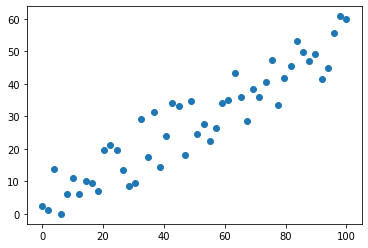

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Let's create a some randon data using linspace
x = np.linspace(0, 100, 50) # creates a range of 50 numbers evenly spaced between 0 and 100
delta = np.random.uniform(-10, 10, x.size)
y = 0.5*x + 3 + delta

plt.scatter(x, y)

In [14]:
# Defining our learning rate
learning_rate = 0.0001

# defining our initial values of b and m
initial_b = 0
initial_m = 0

# Setting how many iterations we wish to run
num_iterations= 1000

print('Initial MSE:', loss_function(initial_m, initial_b, x, y))
[b, m] = gradient_descent(initial_b, initial_m, x, y, learning_rate, num_iterations)
print('b:', b)
print('m:', m)
print('MSE:', loss_function(m, b, x, y))

Initial MSE: 1069.7353268029851
b: 0.1352975362896139
m: 0.5523856779418667
MSE: 34.60765125923983


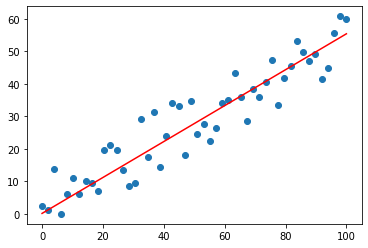

In [20]:
predictions = [(m * x[i]) + b for i in range(len(x))]
plt.scatter(x, y)
plt.plot(x, predictions, color='r')

### Lets try with SK library

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
x = x.reshape((-1, 1))

In [17]:
lr = LinearRegression()
lr.fit(x,y)


LinearRegression()

In [19]:
# Get our model paramters
print('Y Intercept #b:', lr.intercept_) 
print('Gradient #m:', lr.coef_)

Y Intercept #b: 2.539380634019345
Gradient #m: [0.51668596]


In [21]:
y_pred = lr.predict(x)

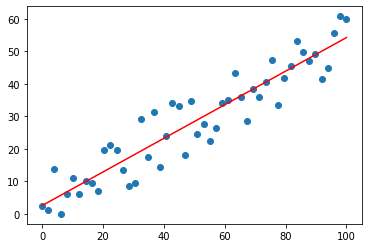

In [22]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')

In [23]:
from sklearn.metrics import mean_squared_error 

print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

Mean squared error: 33.12
